In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('Add_sales_data_2018.csv')
df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


# 1. check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [3]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


<AxesSubplot:>

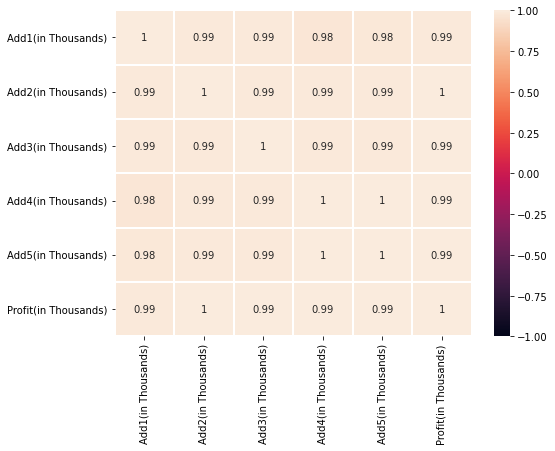

In [4]:
corrmatrix=df.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=0.2)

 there is strong relationship between the amount spent for advertising through five different companies and profit generated

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [5]:
y=df['Profit(in Thousands)']
x=df.drop(['Profit(in Thousands)','Date'], axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
from sklearn import linear_model
lr= linear_model.LinearRegression()
model= lr.fit(x_train,y_train)
prediction =model.predict(x_test)
from sklearn.metrics import mean_squared_error as msr
from sklearn.metrics import r2_score
print('MSE is : ', msr(y_test,prediction))
print('r2 value is :', r2_score(y_test,prediction))

MSE is :  3.429773271561334e-25
r2 value is : 1.0


# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.


In [6]:
x=np.array([290,312,309,298,320]).reshape(1,-1)
x

array([[290, 312, 309, 298, 320]])

In [7]:
y_predict=model.predict(x)
y_predict

C:\Users\Wahu_Buzz\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5820.06])